#### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape
# rows = 1338, cols = 7

(1338, 7)

### Data Preprocessing

#### 1) Handle Null Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### 2) Handle Duplicates

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Separate Num and cat features

In [9]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### EDA

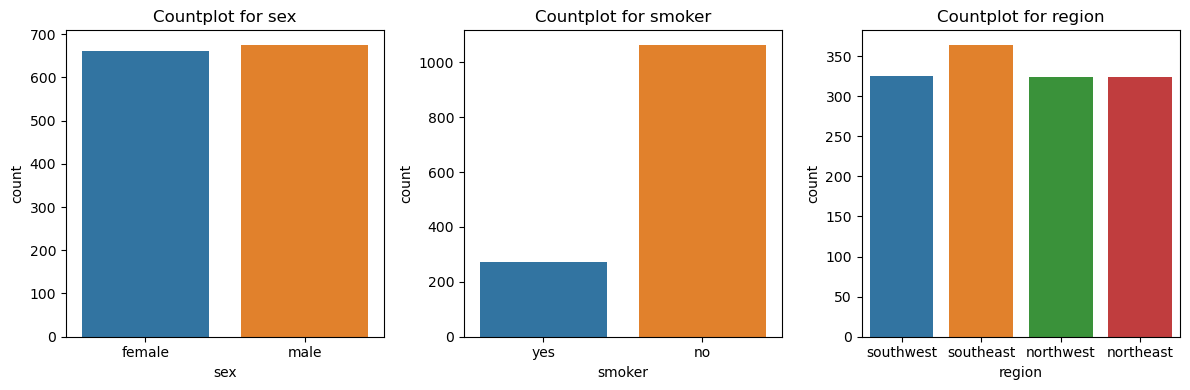

In [13]:
plt.figure(figsize=(12,4))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(f'Countplot for {cat_cols[i]}')

plt.tight_layout()
plt.show()

#### Variation of Cat_cols wrt target Variable  - Boxplot

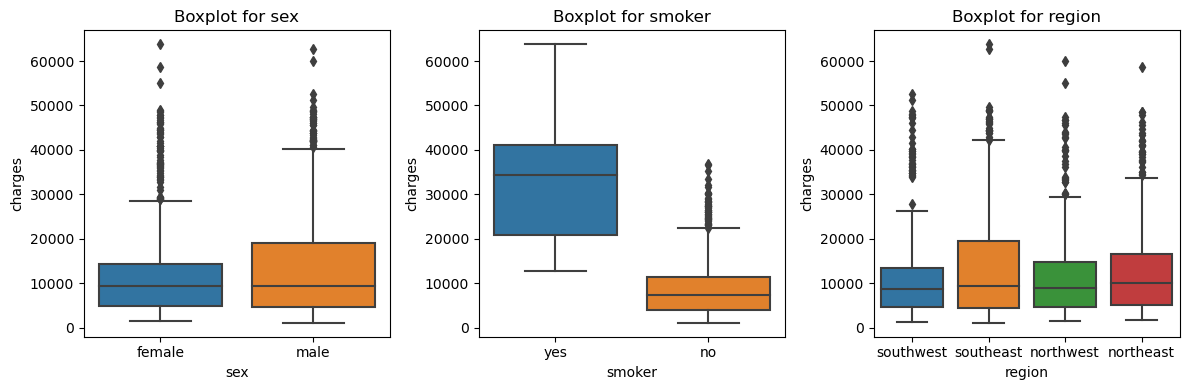

In [15]:
plt.figure(figsize=(12,4))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)  # (1,3,1),(1,3,2),(1,3,3)
    sns.boxplot(x=df[cat_cols[i]],y=df['charges'])
    plt.title(f'Boxplot for {cat_cols[i]}')

plt.tight_layout()
plt.show()

#### Continuous Features

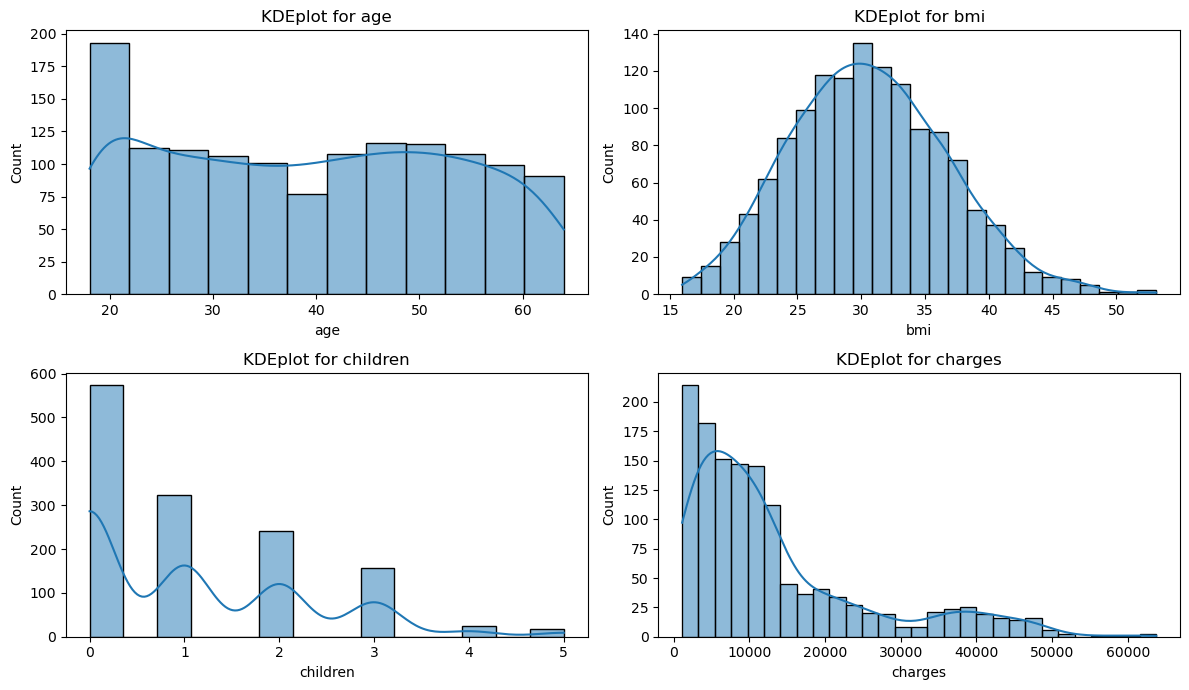

In [20]:
plt.figure(figsize=(12,7))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)  # (2,2,1), (2,2,2), (2,2,3),(2,2,4)
    sns.histplot(x=df[num_cols[i]],kde=True)
    plt.title(f'KDEplot for {num_cols[i]}')
plt.tight_layout()
plt.show()

#### Correlation

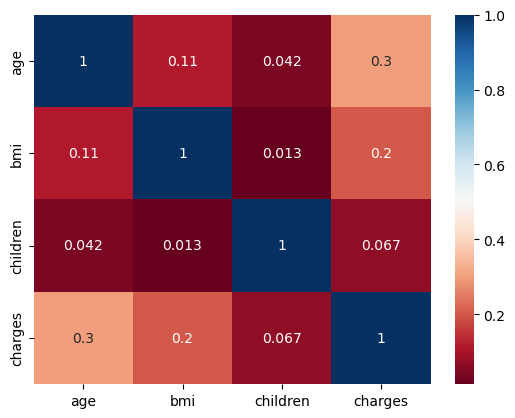

In [23]:
corr = df.corr()

# plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Outlier treatment

In [25]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,98%,99%,max
age,18.0000,18.00000,18.0000,18.00000,39.0000,62.0000,63.000000,64.000000,64.00000
bmi,15.9600,17.89420,19.2692,21.24800,30.4000,41.1080,43.920800,46.411200,53.13000
children,0.0000,0.00000,0.0000,0.00000,1.0000,3.0000,4.000000,5.000000,5.00000
charges,1121.8739,1252.95744,1621.7308,1767.49292,9386.1613,41210.0498,46677.324238,48537.796878,63770.42801


In [26]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [30]:
print(df[df['charges']>48537.796878].shape)
print(df[df['charges']<1252.95744].shape)

(14, 7)
(14, 7)


In [31]:
df['charges'] = np.where(df['charges']>48537.796878,48537.796878,df['charges'])
df['charges'] = np.where(df['charges']<1252.95744,1252.95744,df['charges'])

In [32]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,98%,99%,max
age,18.00000,18.000000,18.0000,18.00000,39.0000,62.0000,63.000000,64.000000,64.000000
bmi,15.96000,17.894200,19.2692,21.24800,30.4000,41.1080,43.920800,46.411200,53.130000
children,0.00000,0.000000,0.0000,0.00000,1.0000,3.0000,4.000000,5.000000,5.000000
charges,1252.95744,1253.309722,1621.7308,1767.49292,9386.1613,41210.0498,46677.324238,48530.512736,48537.796878


#### Encoding categorical Features

In [34]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [35]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [36]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lb = LabelEncoder()
for i in ['sex','smoker']:
    df[i] = lb.fit_transform(df[i])

In [40]:
df.head()
# Cat -> Continuous : Encodeing (LabelEncoder, Dummy Variable, One HOt Encoder)
# Cat -> Cat : Binning (Quartile Binning, Custom Binning)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [42]:
df_dum = pd.get_dummies(data=df,columns=['region'],drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(1337, 9)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


#### Select x and y

In [45]:
x = df_dum.drop('charges',axis=1)
y = df_dum['charges']
print(x.shape)
print(y.shape)

(1337, 8)
(1337,)


#### Split data into train and test

In [46]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1002, 8)
(335, 8)
(1002,)
(335,)


#### Create a function to evaluate the model

In [33]:
from sklearn.metrics import *

In [57]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse,'Test_MAE':test_mae},
                       index=[mname])
    return res

In [50]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

#### Model Building

#### 1) Lin Reg

In [58]:
lr = LinearRegression()
lr_res = eval_model(lr,x_train,y_train,x_test,y_test,'Lin_Reg')
lr_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg,0.758996,0.745287,3.487617e+07,5905.604992,4165.240422


#### 2) Ridge Regression

In [63]:
rid = Ridge(alpha=0.2)
rid_res = eval_model(rid,x_train,y_train,x_test,y_test,'Ridge')
rid_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Ridge,0.758995,0.745332,3.486991e+07,5905.07497,4167.031289


#### 3) Lasso

In [65]:
las = Lasso(alpha=12)
las_res = eval_model(las,x_train,y_train,x_test,y_test,'Lasso')
las_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lasso,0.75897,0.745803,3.480546e+07,5899.615026,4164.904798


#### 4) DT Reg

In [67]:
dt = DecisionTreeRegressor(max_depth=5,min_samples_split=10)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DT_Reg')
dt_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DT_Reg,0.887349,0.840709,2.181057e+07,4670.178397,2577.752753


#### 5) AdaBoost Reg

In [76]:
adab = AdaBoostRegressor(n_estimators=80,random_state=42)
adab_res = eval_model(adab,x_train,y_train,x_test,y_test,'Adab_Reg')
adab_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Adab_Reg,0.84203,0.811865,2.576009e+07,5075.439796,3918.847993


#### 6) RF Reg

In [87]:
rf = RandomForestRegressor(n_estimators=100,max_depth=4,min_samples_split=8)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'RF_Reg')
rf_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg,0.883141,0.848838,2.069755e+07,4549.456476,2527.822317


#### 7) KNN Reg

In [80]:
knn = KNeighborsRegressor(n_neighbors=7)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN_Reg')
knn_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
KNN_Reg,0.341918,0.181426,1.120817e+08,10586.866224,7620.199155


#### Tabulate All Results

In [88]:
res = pd.concat([lr_res,rid_res,las_res, dt_res,adab_res,rf_res,knn_res])
res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg,0.758996,0.745287,3.487617e+07,5905.604992,4165.240422
Ridge,0.758995,0.745332,3.486991e+07,5905.074970,4167.031289
Lasso,0.758970,0.745803,3.480546e+07,5899.615026,4164.904798
DT_Reg,0.887349,0.840709,2.181057e+07,4670.178397,2577.752753
Adab_Reg,0.842030,0.811865,2.576009e+07,5075.439796,3918.847993
RF_Reg,0.883141,0.848838,2.069755e+07,4549.456476,2527.822317
KNN_Reg,0.341918,0.181426,1.120817e+08,10586.866224,7620.199155


#### Model Selection

1) RMSE  : Best Model(with Min RMSE) : RF_Reg and DT_Reg<br>
2) Explainatory capability and minimal overfitting : RF_Reg     

#### Save the model

In [89]:
import pickle

In [90]:
pickle.dump(lr,open('lr_model_28Oct.pkl','wb'))
pickle.dump(dt,open('dt_model_28Oct.pkl','wb'))
pickle.dump(rf,open('rf_model_28Oct.pkl','wb'))

In [91]:
df_dum.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [92]:
df_dum.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13230.249307,0.242334,0.272251,0.243082
std,14.044333,0.500163,6.100468,1.205571,0.403806,11940.700792,0.428655,0.445285,0.429104
min,18.000000,0.000000,15.960000,0.000000,0.000000,1252.957440,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,48537.796878,1.000000,1.000000,1.000000


In [93]:
df_dum['sex'].value_counts()
# male      675
# female    662

1    675
0    662
Name: sex, dtype: int64

In [94]:
df_dum['smoker'].value_counts()
# no     1063
# yes     274

0    1063
1     274
Name: smoker, dtype: int64

In [95]:
df_dum['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64